# Topic 5
### Eun Ju Jong 
### CIS 397
### Dr. Hallenbeck

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import scipy.optimize as opt

## Exercise 1 -  Fitting Teen Pregnancy Data.

Importing data from the Teenage Birth Rate csv file:

In [9]:
state = []
poverty = []
birth15to17 = []
birth18to19 = []
violcrime = []
teenbirth = []

with open('poverty.csv', newline='') as csvfile:
    povreader = csv.reader(csvfile, delimiter=',')
    for row in povreader:
        state.append(row[0])
        poverty.append(row[1])
        birth15to17.append(row[2])
        birth18to19.append(row[3])
        violcrime.append(row[4])
        teenbirth.append(row[5])

In [27]:
poverty = poverty[1:]
teenbirth = teenbirth[1:]

teenbirth = np.array(teenbirth, dtype = 'float64')
poverty = np.array(poverty, dtype = 'float64')

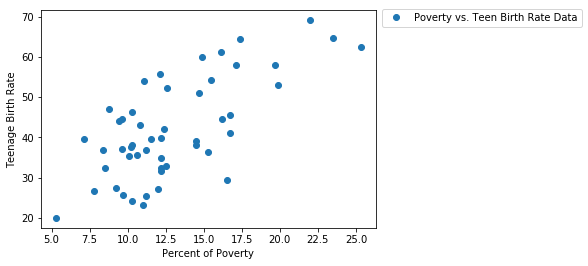

In [40]:
xdata = poverty
ydata = teenbirth

plt.plot(xdata, ydata, 'o', label = 'Poverty vs. Teen Birth Rate Data')

plt.legend(loc = 'upper right', bbox_to_anchor=(1.63, 1.03))
plt.xlabel('Percent of Poverty')
plt.ylabel('Teenage Birth Rate')
plt.show()

When we plot the data of Teenage Birth Rate, we get the distribution above. From here, if we want to predict the parameters from the estimates on the ranges, we use the function 'opt.curve_fit'. 

In this case, we expect the function to be a positive linear line because as the poverty rate gets higher, the percentage of teenage birth of the age between 15 to 17 increases. 

#### A teenage Birth function: 

In [13]:
def teenBirth_f(x, A, B):
    return A * x + B

#### Parameters and estimates on their range of The Teenage Birth Rate data:

In [38]:
parameters, covar_matrix = opt.curve_fit(teenBirth_f, xdata, ydata)

print(parameters)
print(covar_matrix)
uncert = np.sqrt(covar_matrix)
print("A = " + str(parameters[0]) + " +/- " + str(2 * uncert[0][0]))
print("95% of all intervals produced in this way will contain the true value of A")

[ 3.01167002  1.29859547]
[[ 0.00054361 -0.00108723]
 [-0.00108723  0.00292886]]
A = 3.01167001639 +/- 0.0466310428913
95% of all intervals produced in this way will contain the true value of A


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


Parameters:
    - A: 3.01167002
    - B: 1.29859547
Range Estimates: 3.01167001639 +/- 0.0466310428913

#### Now, fit the data. 

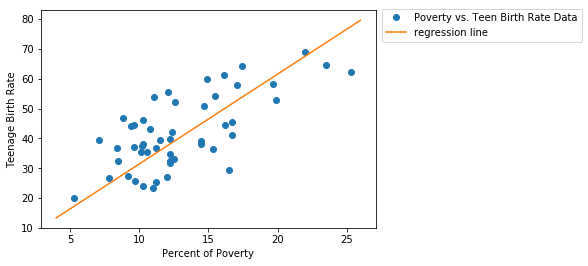

In [50]:
xdata = np.linspace(4, 26, 50)
ydata = teenBirth_f(xdata, 3, 1.3)

plt.plot(poverty, teenbirth, 'o', label = 'Poverty vs. Teen Birth Rate Data')
plt.plot(xdata, teenBirth_f(xdata, parameters[0], parameters[1]), label = 'regression line')

plt.legend(loc = 'upper right', bbox_to_anchor=(1.63, 1.03))
plt.xlabel('Percent of Poverty')
plt.ylabel('Teenage Birth Rate')
plt.show()

From the estimates we get of A and B, we are able to get the best-fit line of regression for the Teenage birth data. 

#### The poverty rate in Puerto Rico is 45% before Hurricane Maria. What teen birth rate do you predict with your functional fit?

In [52]:
print(teenBirth_f(45, parameters[0], parameters[1]))

136.823746207


According to the estimated function, the birth rate of teenager at the poverty rate of 45% is 136.824.

## Exercise 2 - Logistic Fit and the Challenger Disaster.

The logistic function is defined as 
<br>
<br>
$p(x) = \displaystyle\frac{1}{1 + e^{-(mx + b)}}$
<br>
<br>
- x is some continuous observable
- m and b are a slope and intercept, i.e. two parameters to fit
- The output, p(x), is the probability of a True outcome

In [15]:
def logistic_f(x, m, b):
    return 1/(1 + np.e**(-(m*x + b)))

In [16]:
Row = []
Date = []
Temp = []
Damaged = []
O_rings = []

with open('challenger.csv', newline='') as csvfile:
    povreader = csv.reader(csvfile, delimiter=',')
    for row in povreader:
        Row.append(row[0])
        Date.append(row[1])
        Temp.append(row[2])
        Damaged.append(row[3])
        O_rings.append(row[4])

In [17]:
Temp = Temp[1:]
Damaged = Damaged[1:]

Temp = np.array(Temp, dtype = 'int')
Damaged = np.array(Damaged, dtype = 'int')
T_temp = []
D_damaged = []

for i in range(len(Damaged)):
    if Damaged[i] == 1:
        D_damaged.append(Damaged[i])
        T_temp.append(Temp[i])
    elif Damaged[i] == 0:
        D_damaged.append(Damaged[i])
        T_temp.append(Temp[i])

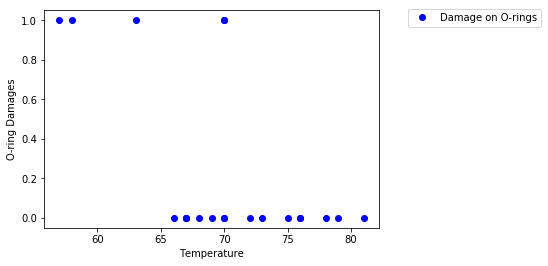

In [61]:
plt.plot(T_temp, D_damaged, 'bo', label = 'Damage on O-rings')

plt.legend(loc = 'upper right', bbox_to_anchor=(1.50, 1.03))
plt.xlabel('Temperature')
plt.ylabel('O-ring Damages')
plt.show()

#### Parameters and estimates on their range of Challenger Disater data:

In [58]:
parameters, covar_matrix = opt.curve_fit(logistic_f, T_temp, D_damaged)

print(parameters)
print(covar_matrix)
uncert = np.sqrt(covar_matrix)
print("m = " + str(parameters[0]) + " +/- " + str(2 * uncert[0][0]))
print("95% of all intervals produced in this way will contain the true value of A")

[ 1.  1.]
[[ inf  inf]
 [ inf  inf]]
m = 1.0 +/- inf
95% of all intervals produced in this way will contain the true value of A


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


The uncertainties of the estimates can be generated because the function is supposedly approaching negative and positive infinity. 
<br>
<br>
Therefore, we will be given the parameters, which are assumed to be the best fitting parameters for the function: m = -0.7, b = 50.

#### Data fitting:

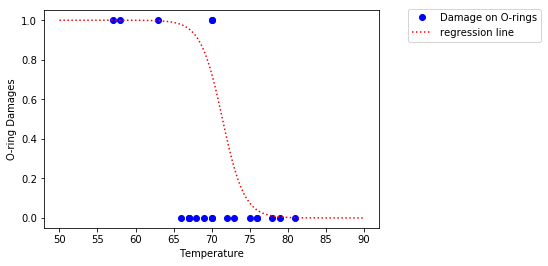

In [60]:
x = np.linspace(50, 90, 100)
y = logistic_f(x, -0.7, 50)

plt.plot(T_temp, D_damaged, 'bo', label = 'Damage on O-rings')
plt.plot(x, y, 'r:', label = 'regression line')

plt.legend(loc = 'upper right', bbox_to_anchor=(1.50, 1.03))
plt.xlabel('Temperature')
plt.ylabel('O-ring Damages')
plt.show()

#### The day the Challenger launched, it was 36°F. According to your model, what is the probability that an o-ring would fail?

In [62]:
print(logistic_f(36, -0.7, 50))

0.9999999999830371


According to the estimated function, the probability of the failure of an o-ring at a temperature of 36°F is 0.9999999999830371, which shows almost an absolute chance of a failure.